# Apprentissage automatique

In [82]:
from pandas import read_csv
import pandas as pd
try:
    fichier = 'BeansDataSet.csv' 
    data = read_csv(fichier,header=0)

    Vente = [f'Vente{i}' for i in range (len(data))]
    data.index = Vente

    pd.set_option('display.max_columns',None)
    pd.set_option('display.float_format','{:.2f}'.format)
    
    print(f'DataFrame \n ----------------------- \n{data}')
except:
    print('Erreur lors du chargement du fichier')


DataFrame 
 ----------------------- 
         Channel Region  Robusta  Arabica  Espresso  Lungo  Latte  Cappuccino
Vente0    Online  South    12669     9656      7561    214   2674        1338
Vente1    Online  South     7057     9810      9568   1762   3293        1776
Vente2    Online  South     6353     8808      7684   2405   3516        7844
Vente3     Store  South    13265     1196      4221   6404    507        1788
Vente4    Online  South    22615     5410      7198   3915   1777        5185
...          ...    ...      ...      ...       ...    ...    ...         ...
Vente435   Store  South    29703    12051     16027  13135    182        2204
Vente436   Store  South    39228     1431       764   4510     93        2346
Vente437  Online  South    14531    15488     30243    437  14841        1867
Vente438   Store  South    10290     1981      2232   1038    168        2125
Vente439   Store  South     2787     1698      2510     65    477          52

[440 rows x 8 columns]


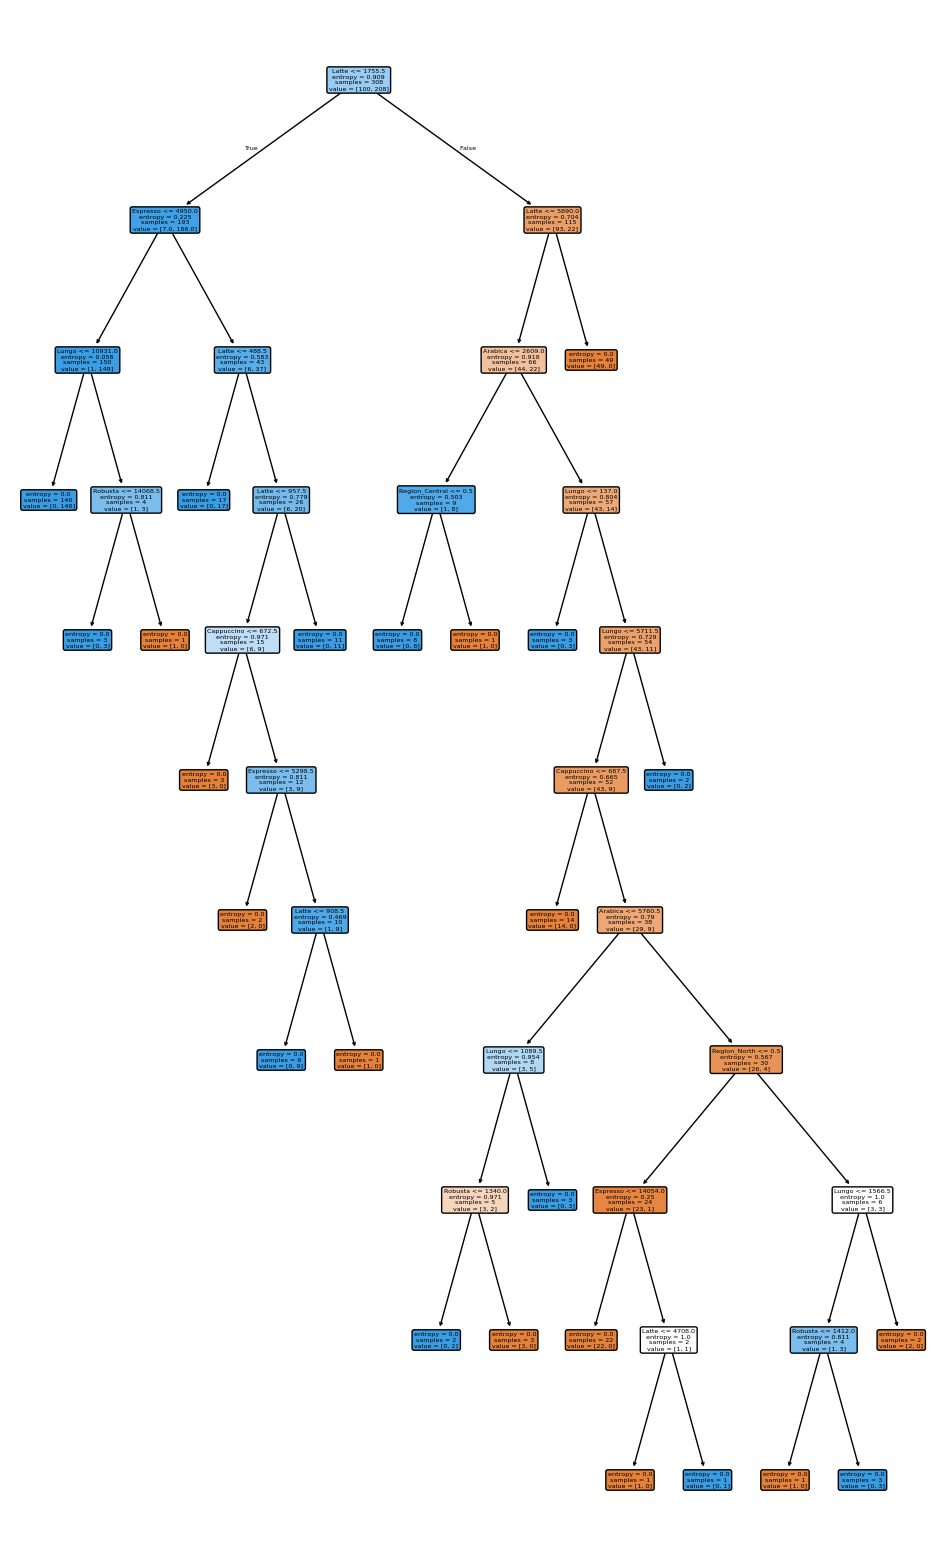

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
import pandas as pd

data = pd.read_csv('./BeansDataSet.csv')

data['Total_Ventes'] = data[['Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino']].sum(axis=1)

data = pd.get_dummies(data, columns=['Region'])

X = data.drop(['Total_Ventes', 'Channel'], axis=1) 
Y = data['Channel']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, Y_train)

figure, ax = plt.subplots(figsize=(12, 20))
tree.plot_tree(model, 
               feature_names=X.columns, 
               filled=True, 
               rounded=True, 
               ax=ax)

plt.show()



In [84]:
# Prédiction
acuracy=model.score(X_test,Y_test)
print(f'Exactitude = {round(acuracy*100,2)}%')
prediction=model.predict(X_test)

for instance,pred,diag in zip (X_test,prediction,Y_test):
    print(f'{instance} --> {pred} VS diag={diag}')

Exactitude = 87.12%
Robusta --> Online VS diag=Store
Arabica --> Store VS diag=Store
Espresso --> Store VS diag=Store
Lungo --> Store VS diag=Store
Latte --> Online VS diag=Online
Cappuccino --> Store VS diag=Store
Region_Central --> Store VS diag=Store
Region_North --> Store VS diag=Store
Region_South --> Store VS diag=Store


In [85]:
#Sauvegarde du modèle
import pickle
model_name='BeansArbre.pkl'
pickle.dump(model,open(model_name,'wb'))

In [86]:
# Chargement du modèle
model_name='BeansArbre.pkl'
model_loaded=pickle.load(open(model_name,'rb'))



In [87]:
import numpy as np
import pickle

# Charger le modèle
with open('./BeansArbre.pkl', 'rb') as model_file:
    model_loaded = pickle.load(model_file)

# Liste des colonnes utilisées lors de l'entraînement (exemple)
model_columns = ['Region_South', 'Region_North', 'Region_Central', 'Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino']

# Nouvelle observation (exemple)
Nouvelle_vente = {
    'Region_South': 1,
    'Region_North': 0,
    'Region_Central': 0,
    'Robusta': 22615,
    'Arabica': 5410,
    'Espresso': 7198,
    'Lungo': 3916,
    'Latte': 1777,
    'Cappuccino': 5185
}

# Convertir la nouvelle observation en array numpy
Nouvelle_vente_array = np.array([[
    Nouvelle_vente['Region_South'],
    Nouvelle_vente['Region_North'],
    Nouvelle_vente['Region_Central'],
    Nouvelle_vente['Robusta'],
    Nouvelle_vente['Arabica'],
    Nouvelle_vente['Espresso'],
    Nouvelle_vente['Lungo'],
    Nouvelle_vente['Latte'],
    Nouvelle_vente['Cappuccino']
]])

# Vérifier l'array avant la prédiction
print("Nouvelle observation sous forme de array :", Nouvelle_vente_array)

# Faire la prédiction avec le modèle chargé
prediction = model_loaded.predict(Nouvelle_vente_array)[0]
print(f"Prédiction : Le canal de vente est : {prediction}")


Nouvelle observation sous forme de array : [[    1     0     0 22615  5410  7198  3916  1777  5185]]
Prédiction : Le canal de vente est : Online


# 2. Classification par regression logistique

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('BeansDataSet.csv')  

data['Total_Ventes'] = data[['Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino']].sum(axis=1)

data = pd.get_dummies(data, columns=['Region'])

X = data.drop(['Total_Ventes', 'Channel'], axis=1) 
Y = data['Channel']

test_size = 0.3 
seed = 11        
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')  
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matrice de confusion :\n{conf_matrix}")
model.fit(x_train,y_train)


Précision du modèle : 93.94%
Matrice de confusion :
[[38  4]
 [ 4 86]]


LogisticRegression(solver='liblinear')

In [89]:
import numpy as np
import pickle

# Charger le modèle
with open('./BeansArbre.pkl', 'rb') as model_file:
    model_loaded = pickle.load(model_file)

model_columns = ['Region_South', 'Region_North', 'Region_Central', 'Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino']

# Nouvelle observation (exemple)
Nouvelle_vente = {
    'Region_South': 1,
    'Region_North': 0,
    'Region_Central': 0,
    'Robusta': 22615,
    'Arabica': 5410,
    'Espresso': 7198,
    'Lungo': 3916,
    'Latte': 1777,
    'Cappuccino': 5185
}

Nouvelle_vente_array = np.array([[
    Nouvelle_vente['Region_South'],
    Nouvelle_vente['Region_North'],
    Nouvelle_vente['Region_Central'],
    Nouvelle_vente['Robusta'],
    Nouvelle_vente['Arabica'],
    Nouvelle_vente['Espresso'],
    Nouvelle_vente['Lungo'],
    Nouvelle_vente['Latte'],
    Nouvelle_vente['Cappuccino']
]])

print("Nouvelle observation sous forme de array :", Nouvelle_vente_array)

prediction = model_loaded.predict(Nouvelle_vente_array)[0]
print(f"Prédiction : Le canal de vente est : {prediction}")


Nouvelle observation sous forme de array : [[    1     0     0 22615  5410  7198  3916  1777  5185]]
Prédiction : Le canal de vente est : Online


# 3. Evaluation

 Matrice de confusion : 
 [[38  4]
 [ 4 86]]
Les mesures d'evaluation sont : 
 ---------------

Accuracy=93.94
Precision=95.56
Rappel=95.56
F1-score=95.56
vrai Positif=86
vrai Negatif=4
faux Positif=86
faux Positif=4
Rapport de classification : 
------------------
              precision    recall  f1-score   support

      Online       0.90      0.90      0.90        42
       Store       0.96      0.96      0.96        90

    accuracy                           0.94       132
   macro avg       0.93      0.93      0.93       132
weighted avg       0.94      0.94      0.94       132

Matrice de confusion : 
------------------
[[38  4]
 [ 4 86]]


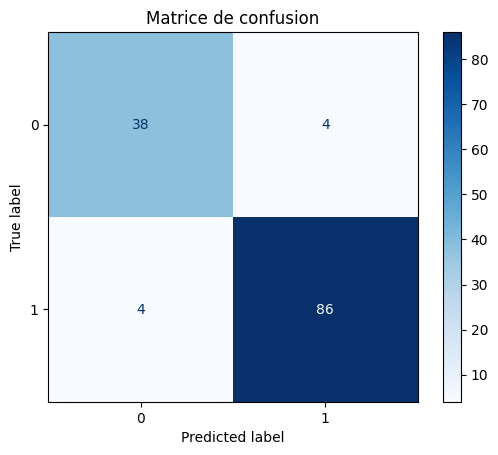

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred=model.predict(x_test)

matrice_confusion=confusion_matrix(y_test,y_pred)
print(f' Matrice de confusion : \n {matrice_confusion}')

def mesures(matrice_confusion):
    TN,FP,FN,TP=matrice_confusion.ravel()
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precision=TP/(TP+FP)
    rappel=TP/(TP+FN)
    f1_score=2*(precision*rappel)/(precision+rappel)
    return accuracy,precision,rappel,f1_score,TP,TN,FP,FN

print(f"Les mesures d'evaluation sont : \n ---------------\n")
acc,pred,rappel,f1,TP,FN,TN,FP=mesures(matrice_confusion)

print(f'Accuracy={round(acc*100,2)}')
print(f'Precision={round(pred*100,2)}')
print(f'Rappel={round(rappel*100,2)}')
print(f'F1-score={round(f1*100,2)}')

print(f'vrai Positif={TP}')
print(f'vrai Negatif={TN}')
print(f'faux Positif={TP}')
print(f'faux Positif={TN}')

#rapport de classification
rapport=classification_report(y_test,y_pred)
print(f'Rapport de classification : \n------------------\n{rapport}')

#Matrice de confusion
matrice=confusion_matrix(y_test,y_pred)
print(f'Matrice de confusion : \n------------------\n{matrice}')

#Affichage de la mmatrice de confusion
confusion=ConfusionMatrixDisplay(confusion_matrix=matrice)
confusion.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# 4. Creation d'un nouveau modele

In [91]:
#sauvegarde du modele
import pickle 
model_name='BeansRegression.pkl'
pickle.dump(model,open(model_name,'wb'))



# 5.Evaluation comparatives

In [92]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

Models=[]
Models.append(('LR',LogisticRegression(solver='newton-cg')))
Models.append(('DT',DecisionTreeClassifier()))
Models.append(('LDA',LinearDiscriminantAnalysis()))
Models.append(('NB',GaussianNB()))
Models.append(('KN',KNeighborsClassifier(n_neighbors=10)))
Models.append(('SVM-C',SVC(probability=True)))

for nom,model in Models:
    #apprentissage
    model.fit(x_train,y_train)
    #prediction
    y_pred=model.predict(x_test)
    y_proba=model.predict_proba(x_test)
    #accuracy
    accuracy=accuracy_score(y_test,y_pred)
    #precision
    precision=precision_score(y_test,y_pred,average='weighted')
    rappel=recall_score(y_test,y_pred,average='weighted')
    F1=f1_score(y_test,y_pred,average='weighted')
    print(f'Modele: {nom} --> Accuracy:{accuracy:.3f} Precision:{precision:.3f} Rappel:{rappel:.3f} f1-score:{F1:.3f}')



Modele: LR --> Accuracy:0.947 Precision:0.947 Rappel:0.947 f1-score:0.947
Modele: DT --> Accuracy:0.856 Precision:0.863 Rappel:0.856 f1-score:0.858
Modele: LDA --> Accuracy:0.864 Precision:0.872 Rappel:0.864 f1-score:0.855
Modele: NB --> Accuracy:0.939 Precision:0.939 Rappel:0.939 f1-score:0.939
Modele: KN --> Accuracy:0.917 Precision:0.919 Rappel:0.917 f1-score:0.917
Modele: SVM-C --> Accuracy:0.932 Precision:0.931 Rappel:0.932 f1-score:0.932


# KNN (k-plus proches voisins)

In [93]:
voisins=[x for x in range(1,100)]
resultats=[]
for k in voisins:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    result=model.score(x_test,y_test)
    resultats.append(result)
    print(f'Voisin: {k} Acc: {round(result*100,3)}')



Voisin: 1 Acc: 86.364
Voisin: 2 Acc: 87.121
Voisin: 3 Acc: 89.394
Voisin: 4 Acc: 89.394
Voisin: 5 Acc: 90.152
Voisin: 6 Acc: 90.152
Voisin: 7 Acc: 89.394
Voisin: 8 Acc: 90.909
Voisin: 9 Acc: 91.667
Voisin: 10 Acc: 91.667
Voisin: 11 Acc: 91.667
Voisin: 12 Acc: 92.424
Voisin: 13 Acc: 91.667
Voisin: 14 Acc: 92.424
Voisin: 15 Acc: 90.909
Voisin: 16 Acc: 91.667
Voisin: 17 Acc: 90.909
Voisin: 18 Acc: 90.909
Voisin: 19 Acc: 90.909
Voisin: 20 Acc: 90.909
Voisin: 21 Acc: 91.667
Voisin: 22 Acc: 91.667
Voisin: 23 Acc: 92.424
Voisin: 24 Acc: 92.424
Voisin: 25 Acc: 92.424
Voisin: 26 Acc: 91.667
Voisin: 27 Acc: 91.667
Voisin: 28 Acc: 91.667
Voisin: 29 Acc: 92.424
Voisin: 30 Acc: 91.667
Voisin: 31 Acc: 91.667
Voisin: 32 Acc: 91.667
Voisin: 33 Acc: 91.667
Voisin: 34 Acc: 90.909
Voisin: 35 Acc: 91.667
Voisin: 36 Acc: 90.909
Voisin: 37 Acc: 90.909
Voisin: 38 Acc: 90.909
Voisin: 39 Acc: 91.667
Voisin: 40 Acc: 90.909
Voisin: 41 Acc: 91.667
Voisin: 42 Acc: 91.667
Voisin: 43 Acc: 91.667
Voisin: 44 Acc: 91.6

In [94]:
# Recherche de meilleur k
voisin_final=np.array(resultats)
indice_max=np.argmax(voisin_final)
print(f'Valeur Max --> {voisins[indice_max]} --> Acc= {round(voisin_final[indice_max],3)}')

Valeur Max --> 12 --> Acc= 0.924
